In [109]:
import numpy as np
import astropy
import astropy.coordinates as ac
import astropy.units as u
import astropy.io
import astropy.table
import scipy
import pandas as pd
import gcutils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
lono,lato,lonf,latf,ro,rf,width=scipy.genfromtxt(lib_end_points_filen,usecols=(3-1,4-1,5-1,6-1,8-1,9-1,10-1),unpack=True)
name,sname,cootype=scipy.genfromtxt(lib_end_points_filen,usecols=(1-1,2-1,7-1),unpack=True,dtype=str)
azs,lats,azcenter,latcenter=gcutils.get_gc_for_pair(lono[i],lato[i],lonf[i],latf[i],degree=True,step=gcstep,dlat=width[i])


In [118]:
tpair = astropy.io.ascii.read("lib_by_pair.dat",header_start=3)
#tpair.replace_column('Ro', tpair["Ro"].astype(float))
tpair

Name,ShortName,lono,lato,lonf,latf,coo(equ/gal),Ro,Rf,Width,Reference
str11,str5,float64,float64,float64,float64,str3,float64,float64,float64,str26
Phoenix,Phe,20.0,-57.0,27.0,-45.0,equ,17.5,17.5,0.18,Balbinot2016
Acheron,Ach,230.0,-2.0,259.0,21.0,equ,3.5,3.8,0.9,Grillmair2009
Cocytos,Coc,186.0,-3.0,259.0,20.0,equ,11.0,11.0,0.7,Grillmair2009
Lethe,Let,171.0,18.0,258.0,20.0,equ,13.0,13.0,0.4,Grillmair2009
Styx,Sty,259.0,21.0,194.0,20.0,equ,45.0,45.0,3.3,Grillmair2009
ACS,ACS,126.4,-0.7,133.9,64.2,equ,8.9,8.9,5.0,Grillmair2006
Pal15,Pal15,255.3,-1.47,254.8,-0.12,equ,38.4,38.4,0.0,Myeong2017
Eridanus,Eri,65.98,-21.42,66.4,-20.96,equ,95.0,95.0,0.0,Myeong2017
TucanaIII,Tuc3,-6.3,-59.7,3.2,-59.4,equ,23.0,27.0,0.18,"Shipp2018,DrlicaWagner2015"


In [120]:
gcstep=0.01
coo_frame=dict(equ="icrs",gal="galactic")

for i in range(tpair["lono"].size)[-3:]:
    
    #Generate track from end-points
    azs,lats,azcenter,latcenter=gcutils.get_gc_for_pair(tpair["lono"][i],tpair["lato"][i],tpair["lonf"][i],tpair["latf"][i],degree=True,step=gcstep,dlat=0.)
    #If a detailed track is lacking and only Ro,Rf are reported, nothing better to do than linear interpolation
    Fd = scipy.interpolate.interp1d([azs[0],azs[-1]],[tpair["Ro"][i],tpair["Rf"][i]])
    distance = Fd(azs)
    #Astropy coords
    coo = ac.SkyCoord( azs*u.deg, lats*u.deg, frame=coo_frame[tpair["coo(equ/gal)"][i]], distance = distance*u.kpc )
    width = tpair["Width"][i]*np.ones_like(azs)
    #Track object
    track=pd.DataFrame(dict(l=coo.galactic.l.deg, b=coo.galactic.b.deg, distance=coo.distance.kpc, ))
    #Print track
    ofilen="track.{Name}.{Ref}.ecsv".format(Name=tpair["Name"][i], Ref=tpair["Reference"][i].lower() )
    print("{N} {Name} -> {ofn}".format(N=i, Name=tpair["Name"][i], ofn=ofilen))
    #as magic ECSV
    t = astropy.table.QTable([coo,width], names=['sc', 'width'])
    astropy.io.ascii.write(t, format='ecsv', output=ofilen)   
    

24 Gaia-4 -> track.Gaia-4.malhan2018.ecsv
25 Gaia-5 -> track.Gaia-5.malhan2018.ecsv
26 Pal13 -> track.Pal13.shipp2020.ecsv


In [124]:
track = [[-15.565,   9.145],
             [-14.881,   9.873],
             [-14.537,  10.957],
             [-13.731,  11.824],
             [-13.373,  12.646],
             [-12.198,  14.068],
             [-11.59 ,  15.172],
             [-10.808,  16.029],
             [-10.176,  16.871],
             [ -9.805,  17.428]]
track = np.array(track)
t = ac.SkyCoord(ra=track[:,0]*u.deg,dec=track[:,1]*u.deg,frame='icrs')


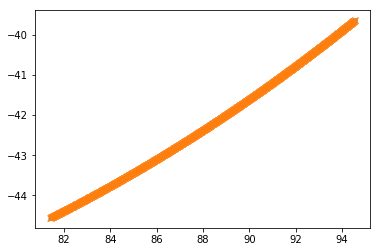

In [131]:
plt.plot(coo.galactic.l.deg,coo.galactic.b.deg,'.')
plt.plot(coo.galactic.l.deg,coo.galactic.b.deg,'x')

In [ ]:
plt.plot(coo.ra.deg,coo.dec.deg,'.')
plt.plot(coo.ra.deg,coo.dec.deg,'x')